<a href="https://colab.research.google.com/github/dipti513/Expense_Splitter/blob/main/Lung_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp311-cp311-linux_x86_64.whl size=400963 sha256=33cb65ef1c6e6d4f193ba2014fdcc97d823ba6dc94ccd95491ac9c8690c1d74a
  Stored in directory: /root/.cache/pip/wheels/a0/d7/97/71bca023a0dbdceab24a556649d661e71114f4eaaf4dda56d6
Successfully built pymrmr


In [ ]:
import pymrmr

In [ ]:
!pip install mrmr_selection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr
from mrmr import mrmr_classif

# Load the dataset
data = pd.read_csv('Lung_fixed.csv')

# Step 1: Normalize the dataset
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]), columns=data.columns[1:])

# Step 2: Feature Selection
# Assuming the last column is the target variable
X = data_normalized.iloc[:, :-1]
y = data_normalized.iloc[:, -1]

# 1. Mutual Information for Regression
info_gain = mutual_info_regression(X, y)
info_gain_features = X.columns[np.argsort(info_gain)[-10:]]

# 2. MRMR
mrmr_features = mrmr_classif(X, y, K=10)

# 3. Pearson Correlation
pearson_corr = [pearsonr(X[col], y)[0] for col in X.columns]
pearson_features = X.columns[np.argsort(np.abs(pearson_corr))[-10:]]

# Step 3: Apply TOPSIS
# Create a decision matrix with the scores from the three methods
decision_matrix = pd.DataFrame({
    'Information Gain': info_gain,
    'MRMR': [1 if col in mrmr_features else 0 for col in X.columns],
    'Pearson Correlation': pearson_corr
}, index=X.columns)

# Normalize the decision matrix
decision_matrix_normalized = decision_matrix / np.linalg.norm(decision_matrix, axis=0)

# Define weights for each criterion (e.g., equal weights)
weights = np.array([0.33, 0.33, 0.34])

# Calculate the weighted normalized decision matrix
weighted_matrix = decision_matrix_normalized * weights

# Determine the ideal and negative-ideal solutions
ideal_best = weighted_matrix.max()
ideal_worst = weighted_matrix.min()

# Calculate the distance to the ideal and negative-ideal solutions
distance_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
distance_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)

# Calculate the TOPSIS score
topsis_score = distance_worst / (distance_best + distance_worst)

# Convert TOPSIS scores to a Pandas Series for sorting
topsis_score_series = pd.Series(topsis_score, index=X.columns)

# Rank the features based on TOPSIS score
ranked_features = topsis_score_series.sort_values(ascending=False)

# Output the top 10 features
top_10_features = ranked_features.index[:10]
print("Top 10 Features:", top_10_features)

100%|██████████| 10/10 [00:27<00:00,  2.77s/it]


Top 10 Features: Index(['32254_at', '36160_s_at', '40165_at', '36148_at', '40825_at',
       '36042_at', '32542_at', '35868_at', '39990_at', '38995_at'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr
from mrmr import mrmr_classif

# Load the dataset
data = pd.read_csv('Lung_fixed.csv')

# Step 1: Normalize the dataset
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data.iloc[:, 1:]), columns=data.columns[1:])

# Step 2: Feature Selection
# Assuming the last column is the target variable
X = data_normalized.iloc[:, :-1]
y = data_normalized.iloc[:, -1]

# 1. Mutual Information for Regression
info_gain = mutual_info_regression(X, y)
info_gain_features = X.columns[np.argsort(info_gain)[-10:]]

# 2. MRMR
mrmr_features = mrmr_classif(X, y, K=10)

# 3. Pearson Correlation
pearson_corr = [pearsonr(X[col], y)[0] for col in X.columns]
pearson_features = X.columns[np.argsort(np.abs(pearson_corr))[-10:]]

# Print top 10 features for each method
print("Top 10 Features by Mutual Information (Information Gain):", info_gain_features.tolist())
print("Top 10 Features by MRMR:", mrmr_features)
print("Top 10 Features by Pearson Correlation:", pearson_features.tolist())

# Step 3: Apply TOPSIS
# Create a decision matrix with the scores from the three methods
decision_matrix = pd.DataFrame({
    'Information Gain': info_gain,
    'MRMR': [1 if col in mrmr_features else 0 for col in X.columns],
    'Pearson Correlation': pearson_corr
}, index=X.columns)

# Normalize the decision matrix
decision_matrix_normalized = decision_matrix / np.linalg.norm(decision_matrix, axis=0)

# Define weights for each criterion (e.g., equal weights)
weights = np.array([0.33, 0.33, 0.34])

# Calculate the weighted normalized decision matrix
weighted_matrix = decision_matrix_normalized * weights

# Determine the ideal and negative-ideal solutions
ideal_best = weighted_matrix.max()
ideal_worst = weighted_matrix.min()

# Calculate the distance to the ideal and negative-ideal solutions
distance_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
distance_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)

# Calculate the TOPSIS score
topsis_score = distance_worst / (distance_best + distance_worst)

# Convert TOPSIS scores to a Pandas Series for sorting
topsis_score_series = pd.Series(topsis_score, index=X.columns)

# Rank the features based on TOPSIS score
ranked_features = topsis_score_series.sort_values(ascending=False)

# Output the top 10 features
top_10_features = ranked_features.index[:10]
print("Top 10 Features by TOPSIS:", top_10_features.tolist())

100%|██████████| 10/10 [00:27<00:00,  2.73s/it]


Top 10 Features by Mutual Information (Information Gain): ['35531_at', '32715_at', '37406_at', '40165_at', '36160_s_at', '32254_at', '36924_r_at', '33322_i_at', '38138_at', '41325_at']
Top 10 Features by MRMR: ['36160_s_at', '36042_at', '38995_at', '39990_at', '32254_at', '36148_at', '35868_at', '40825_at', '40165_at', '32542_at']
Top 10 Features by Pearson Correlation: ['39685_at', '162_at', '41498_at', '38032_at', '40410_at', '40825_at', '38368_at', '35414_s_at', '39561_at', '1420_s_at']
Top 10 Features by TOPSIS: ['32254_at', '36160_s_at', '40165_at', '36148_at', '40825_at', '36042_at', '32542_at', '35868_at', '39990_at', '38995_at']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load your dataset (replace 'Lung_fixed.csv' with your dataset)
data = pd.read_csv('Lung_fixed.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Check class distribution
print("Class distribution in y:", y.value_counts())

# Remap the labels to start from 0 (e.g., [0, 1, 2, 3, 4])
y = y - 1

# Check unique classes after remapping
print("Unique classes in y after remapping:", np.unique(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='macro')        # Use 'macro' for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multi-class

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print predictions and ground truth for the first 10 samples
    print(f"Sample predictions for {name}:", y_pred[:10])
    print(f"Sample ground truth:", y_test[:10])
    print(f"Metrics for {name}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1 Score={f1}")
    print("-" * 50)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

Class distribution in y: type
1    139
4     21
5     20
2     17
3      6
Name: count, dtype: int64
Unique classes in y after remapping: [0 1 2 3 4]
X_train shape: (142, 12601)
X_test shape: (61, 12601)
y_train shape: (142,)
y_test shape: (61,)
Training Logistic Regression...
Sample predictions for Logistic Regression: [0 0 0 0 0 0 0 3 4 3]
Sample ground truth: 15     0
9      0
115    0
78     0
66     0
45     0
143    1
177    3
200    4
180    3
Name: type, dtype: int64
Metrics for Logistic Regression: Accuracy=0.9180327868852459, Precision=0.9271402550091075, Recall=0.825, F1 Score=0.9120057859209257
--------------------------------------------------
Training KNN...
Sample predictions for KNN: [0 0 0 0 0 0 1 3 4 3]
Sample ground truth: 15     0
9      0
115    0
78     0
66     0
45     0
143    1
177    3
200    4
180    3
Name: type, dtype: int64
Metrics for KNN: Accuracy=0.9344262295081968, Precision=0.9403874813710879, Recall=0.9, F1 Score=0.9277907884465262
-----------------

In [ ]:
!pip install imbalanced-learn

Class distribution in y_test: type
0    42
3     6
4     6
1     5
2     2
Name: count, dtype: int64


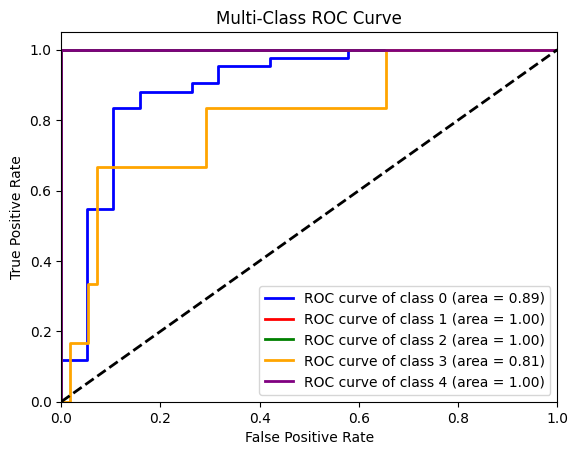

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load your dataset (replace 'Lung_fixed.csv' with your dataset)
data = pd.read_csv('Lung_fixed.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Remap the labels to start from 0 (e.g., [0, 1, 2, 3, 4])
y = y - 1

# Split the dataset into training and testing sets (use stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution in y_test
print("Class distribution in y_test:", pd.Series(y_test).value_counts())

# Address class imbalance using SMOTE with adjusted k_neighbors
# Set k_neighbors to a value less than the smallest minority class size
smote = SMOTE(random_state=42, k_neighbors=min(pd.Series(y_train).value_counts())-1 if min(pd.Series(y_train).value_counts())>1 else 1 )  # Adjust k_neighbors
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature selection to improve model performance
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train_res = selector.fit_transform(X_train_res, y_train_res)
X_test = selector.transform(X_test)

# Train the XGBoost model with hyperparameter tuning
model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train_res, y_train_res)

# Binarize the output (one-hot encoding for multi-class)
# Explicitly specify all 5 classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_true, y_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

ValueError: multiclass format is not supported

Class distribution in y_test: type
0    42
3     6
4     6
1     5
2     2
Name: count, dtype: int64


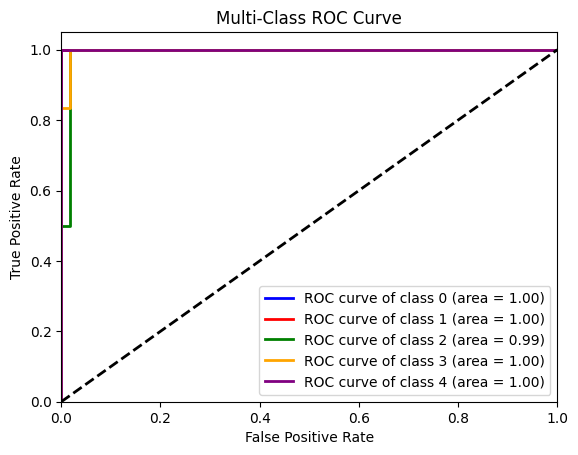

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load your dataset (replace 'Lung_fixed.csv' with your dataset)
data = pd.read_csv('Lung_fixed.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Remap the labels to start from 0 (e.g., [0, 1, 2, 3, 4])
y = y - 1

# Split the dataset into training and testing sets (use stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution in y_test
print("Class distribution in y_test:", pd.Series(y_test).value_counts())

# Train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Binarize the output (one-hot encoding for multi-class)
# Explicitly specify all 5 classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

Best Model: XGBoost
Unique classes in y_test: [0 1 3 4]
Unique classes in y_pred: [0 1 3 4]


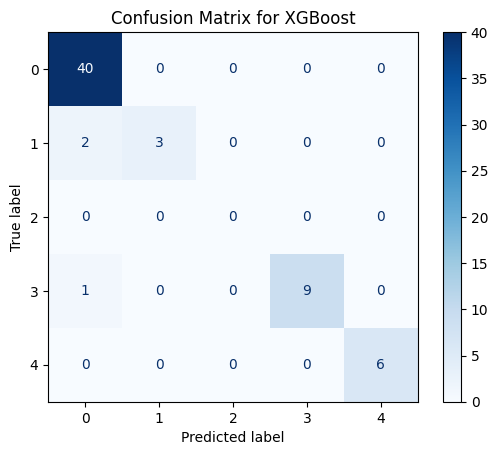

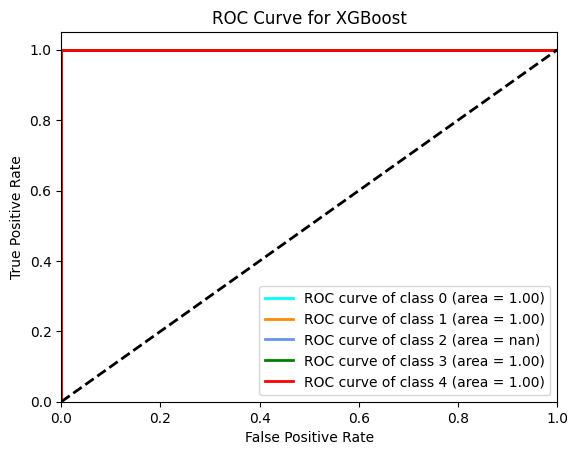

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Identify the best model based on accuracy
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")

# Confusion Matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))  # Add labels argument

# Check unique classes in y_test and y_pred
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in y_pred:", np.unique(y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))  # Use np.unique(y)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()


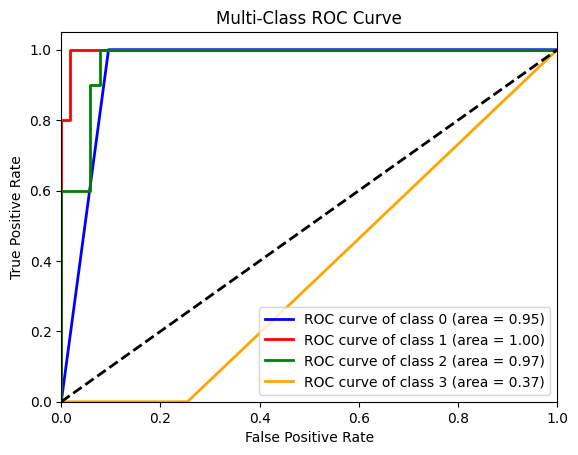

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output (one-hot encoding for multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import pandas as pd

# Ensure y_test contains all 5 classes
print("Class distribution in y_test:", pd.Series(y_test).value_counts())

# Explicitly specify all 5 classes in label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

Class distribution in y_test: type
1    40
4    10
5     6
2     5
Name: count, dtype: int64


NotFittedError: need to call fit or load_model beforehand

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.60      0.75         5
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         6

    accuracy                           0.95        61
   macro avg       0.98      0.88      0.92        61
weighted avg       0.95      0.95      0.95        61



In [ ]:
print("Class distribution in y_train:", y_train.value_counts())

Class distribution in y_train: type
0    99
4    14
1    12
3    11
2     6
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.97560976 0.92682927 0.97560976 0.925      0.9       ]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'n_estimators': 200}


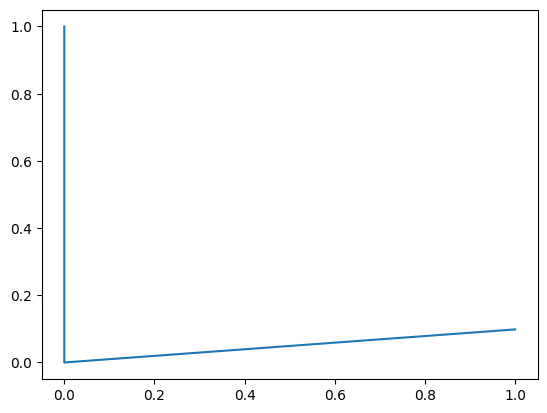

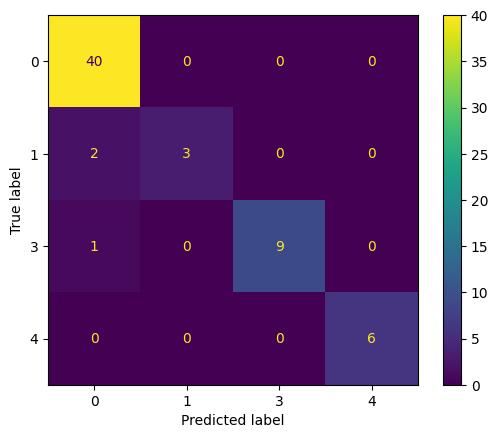

In [ ]:
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
plt.plot(recall, precision, label=f'Class {i}')

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Load the dataset
data = pd.read_csv('Lung_fixed.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results.append([name, accuracy, precision, recall, f1])

# Create a DataFrame to display results in a table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Identify the best model (based on accuracy)
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Retrain the best model (optional, since it's already trained)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix for {best_model_name}:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]